In [1]:
using Pkg 
Pkg.add("ShapML")
Pkg.add("RDatasets")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed ShapML ─ v0.3.1
    Updating `~/gitRepos/ml-demos/Project.toml`
  [8523bd24] + ShapML v0.3.1
    Updating `~/gitRepos/ml-demos/Manifest.toml`
  [8523bd24] + ShapML v0.3.1
  [83423d85] ↑ Cairo_jll v1.16.1+0 ⇒ v1.16.1+1
  [7746bdde] ↑ Glib_jll v2.68.3+1 ⇒ v2.68.3+2
Precompiling project...
  ✓ Requires
  ✓ Static
  ✓ Tables
  ✓ Compat
  ✓ SentinelArrays
  ✓ RandomNumbers
  ✓ Memento
  ✓ Latexify
  ✓ CategoricalArrays
  ✓ StructArrays
  ✓ Random123
  ✓ FilePathsBase
  ✓ ChainRulesCore
  ✓ ArrayInterface
  ✓ ARFFFiles
  ✓ ChangesOfVariables
  ✓ DataStructures
  ✓ JLSO
  ✓ GPUCompiler
  ✓ SortingAlgorithms
  ✓ PrettyTables
  ✓ FiniteDiff
  ✓ LogExpFunctions
  ✓ PlotThemes
  ✓ QuadGK
  ✓ NNlib
  ✓ StatsBase
  ✓ LatinHypercubeSampling
  ✓ ChainRules
  ✓ MultivariateStats
  ✓ LossFunctions
  ✓ GeometryBasics
  ✓ SpecialFunctions
  ✓ DiffRules
  ✓ NearestNeighborModels
  ✓ MLJMultivariateSta

# Example 1: Non-parallel Random Forest

In [5]:
using ShapML
using RDatasets
using DataFrames 
using MLJ
using Plots

In [17]:
boston = RDatasets.dataset("MASS", "Boston")

,Crim,Zn,Indus,Chas,NOx,Rm,Age,Dis,Rad,Tax
,Float64,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Int64,Int64
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222
6,0.02985,0.0,2.18,0,0.458,6.43,58.7,6.0622,3,222
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311
8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311
9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311


In [18]:
outcome_name = "MedV"

y, X = MLJ.unpack(boston, ==(Symbol(outcome_name)), colname -> true)

([24.0, 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9  …  19.7, 18.3, 21.2, 17.5, 16.8, 22.4, 20.6, 23.9, 22.0, 11.9], 506×13 DataFrame
 Row │ Crim     Zn       Indus    Chas   NOx      Rm       Age      Dis      R ⋯
     │ Float64  Float64  Float64  Int64  Float64  Float64  Float64  Float64  I ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 0.00632     18.0     2.31      0    0.538    6.575     65.2   4.09      ⋯
   2 │ 0.02731      0.0     7.07      0    0.469    6.421     78.9   4.9671
   3 │ 0.02729      0.0     7.07      0    0.469    7.185     61.1   4.9671
   4 │ 0.03237      0.0     2.18      0    0.458    6.998     45.8   6.0622
   5 │ 0.06905      0.0     2.18      0    0.458    7.147     54.2   6.0622    ⋯
   6 │ 0.02985      0.0     2.18      0    0.458    6.43      58.7   6.0622
   7 │ 0.08829     12.5     7.87      0    0.524    6.012     66.6   5.5605
   8 │ 0.14455     12.5     7.87      0    0.524    6.172     96.1   5.9

Let's make a random forest 

In [19]:
random_forest = @load RandomForestRegressor pkg = "DecisionTree"

import MLJDecisionTreeInterface ✔


┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main /home/john/.julia/packages/MLJModels/GKDnU/src/loading.jl:168


MLJDecisionTreeInterface.RandomForestRegressor

In [20]:
model = machine(random_forest(), X, y)

Machine{RandomForestRegressor,…} trained 0 times; caches data
  args: 
    1:	Source @274 ⏎ `Table{Union{AbstractVector{Continuous}, AbstractVector{Count}}}`
    2:	Source @009 ⏎ `AbstractVector{Continuous}`


In [21]:
fit!(model)

┌ Info: Training Machine{RandomForestRegressor,…}.
└ @ MLJBase /home/john/.julia/packages/MLJBase/QXObv/src/machines.jl:403


Machine{RandomForestRegressor,…} trained 1 time; caches data
  args: 
    1:	Source @274 ⏎ `Table{Union{AbstractVector{Continuous}, AbstractVector{Count}}}`
    2:	Source @009 ⏎ `AbstractVector{Continuous}`


now we create a wrapper function to perform predictions and return dataframes 

In [22]:
function predict_function(model, data)
    data_pred = DataFrame(y_pred = predict(model, data))
    return data_pred
end

predict_function (generic function with 1 method)

In [23]:
# ShapML setup.
explain = copy(boston[1:300, :]) # Compute Shapley feature-level predictions for 300 instances.
explain = select(explain, Not(Symbol(outcome_name)))  # Remove the outcome column.

reference = copy(boston)  # An optional reference population to compute the baseline prediction.
reference = select(reference, Not(Symbol(outcome_name)))

,Crim,Zn,Indus,Chas,NOx,Rm,Age,Dis,Rad,Tax
,Float64,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Int64,Int64
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222
6,0.02985,0.0,2.18,0,0.458,6.43,58.7,6.0622,3,222
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311
8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311
9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311


In [24]:
sample_size = 60  # Number of Monte Carlo samples.

60

In [38]:
# Compute stochastic Shapley values.
data_shap = ShapML.shap(explain = explain,
                        model = model,
                        predict_function = predict_function,
                        sample_size = sample_size,
                        seed = 42
                        )

,index,feature_name,feature_value,shap_effect,shap_effect_sd,intercept
,Int64,String,Float64?,Float64,Float64,Float64
1,1,Crim,0.00632,-1.20317,1.51573,25.8945
2,2,Crim,0.02731,-0.704333,1.09454,25.8945
3,3,Crim,0.02729,-0.1125,0.897616,25.8945
4,4,Crim,0.03237,0.160833,0.911749,25.8945
5,5,Crim,0.06905,0.0108333,0.776147,25.8945
6,6,Crim,0.02985,-0.3505,0.918956,25.8945
7,7,Crim,0.08829,0.270333,0.832544,25.8945
8,8,Crim,0.14455,0.391833,1.06812,25.8945
9,9,Crim,0.21124,0.183,0.927547,25.8945


In [39]:
show(data_shap, allcols = true)

3900×6 DataFrame
  Row │ index  feature_name  feature_value  shap_effect  shap_effect_sd  intercept 
      │ Int64  String        Float64?       Float64      Float64         Float64   
──────┼────────────────────────────────────────────────────────────────────────────
    1 │     1  Crim                0.00632   -1.20317          1.51573     25.8945
    2 │     2  Crim                0.02731   -0.704333         1.09454     25.8945
    3 │     3  Crim                0.02729   -0.1125           0.897616    25.8945
    4 │     4  Crim                0.03237    0.160833         0.911749    25.8945
    5 │     5  Crim                0.06905    0.0108333        0.776147    25.8945
    6 │     6  Crim                0.02985   -0.3505           0.918956    25.8945
    7 │     7  Crim                0.08829    0.270333         0.832544    25.8945
    8 │     8  Crim                0.14455    0.391833         1.06812     25.8945
    9 │     9  Crim                0.21124    0.183            0.92

In [40]:
names(data_shap)

6-element Vector{String}:
 "index"
 "feature_name"
 "feature_value"
 "shap_effect"
 "shap_effect_sd"
 "intercept"

Now we group the result by the feature name and take the mean value of the abs of `:shap_effect`

In [41]:
gdf = groupby(data_shap, :feature_name) 
data_plot = combine(gdf, :shap_effect => (x->mean(abs.(x))) => :mean_effect)

,feature_name,mean_effect
,String,Float64
1,Crim,0.332918
2,Zn,0.144365
3,Indus,0.360383
4,Chas,0.0219922
5,NOx,0.159389
6,Rm,3.04907
7,Age,0.325239
8,Dis,0.479312
9,Rad,0.119549


In [42]:
idx = sortperm(data_plot.mean_effect)

13-element Vector{Int64}:
  4
  9
 12
  2
  5
  7
 10
  1
  3
  8
 11
 13
  6

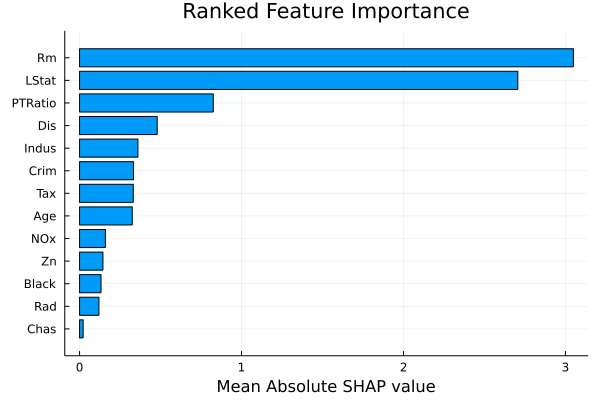

In [44]:
bar(data_plot.feature_name[idx], data_plot.mean_effect[idx], orientation = :horizontal, label="")
xlabel!("Mean Absolute SHAP value")
title!("Ranked Feature Importance")